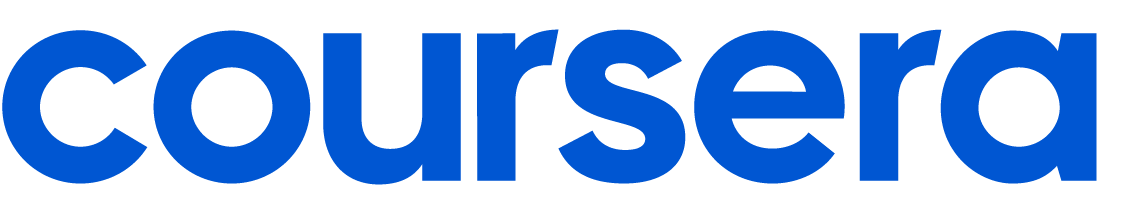

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [3]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [4]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Import any other packages you may want to use
# importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [6]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [7]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [ ]:
# cleaninig the data
train_df.isnull().sum()

In [ ]:
# checking for duplicates
train_df.duplicated().sum()

In [ ]:
train_df['Churn'].value_counts()

In [ ]:
# visualizing the data
train_df['Churn'].value_counts().plot(kind='bar')

plt.title('Churn Distribution from Training Data')
plt.xlabel('Churn')
plt.ylabel('Count')

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

# Using Decision Tree Classifier

In [ ]:
X_train = train_df.drop(['Churn'], axis=1)
y_train = train_df['Churn']

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns

# removing CustomerID column
categorical_columns = categorical_columns.drop(['CustomerID'])

In [ ]:
# performing one hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[categorical_columns])

encoded_cols = encoder.get_feature_names_out(categorical_columns)
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_columns]), index=X_train.index, columns=encoded_cols)

In [ ]:
new_X_train = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded], axis=1)

In [ ]:
# training the model
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# dropping the CustomerID column
new_X_train = new_X_train.drop(['CustomerID'], axis=1)

In [ ]:
# fitting the model
tree.fit(new_X_train, y_train)

In [ ]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i, idx in enumerate(indices):
    print("%d. %s (%f)" % (i + 1, new_X_train.columns[idx], importances[idx]))

In [ ]:
X_test_encoded = pd.DataFrame(encoder.transform(test_df[categorical_columns]), columns=encoded_cols, index=test_df.index)
X_test_final = pd.concat([test_df.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

In [ ]:
predicted_probability = tree.predict_proba(X_test_final.drop(['CustomerID'], axis=1))[:, 1]

# Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = train_df.drop(['CustomerID','Churn'], axis=1)
y_train = train_df['Churn']

In [ ]:
X_test = test_df.drop(['CustomerID'], axis=1)

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# GridSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
}

In [ ]:
rf_model = RandomForestClassifier(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
# performing grid search with cross validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# getting the best model and its parameters
best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

In [ ]:
# predicted_probability = rf_model.predict_proba(X_test)[:, 1] # for random forest model
predicted_probability = best_model.predict_proba(X_test)[:, 1] # for grid search model

# Random Forest Classifier with Feature Selection

In [135]:
X_train = train_df.drop(['CustomerID','Churn'], axis=1)
y_train = train_df['Churn']

In [136]:
X_test = test_df.drop(['CustomerID'], axis=1)

In [137]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [138]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [139]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [140]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)
importance_df

,feature,importance
10,AverageViewingDuration,0.113785
9,ViewingHoursPerWeek,0.109322
1,MonthlyCharges,0.100926
2,TotalCharges,0.097377
0,AccountAge,0.095188
13,UserRating,0.089829
11,ContentDownloadsPerMonth,0.083537
16,WatchlistSize,0.063846
14,SupportTicketsPerMonth,0.046402
12,GenrePreference,0.033273


In [141]:
selected_features = importance_df[importance_df['importance'] > 0.01]['feature'].values
selected_features

array(['AverageViewingDuration', 'ViewingHoursPerWeek', 'MonthlyCharges',
       'TotalCharges', 'AccountAge', 'UserRating',
       'ContentDownloadsPerMonth', 'WatchlistSize',
       'SupportTicketsPerMonth', 'GenrePreference', 'DeviceRegistered',
       'PaymentMethod', 'ContentType', 'SubscriptionType',
       'ParentalControl', 'PaperlessBilling', 'MultiDeviceAccess',
       'Gender', 'SubtitlesEnabled'], dtype=object)

In [142]:
new_X_train = X_train[selected_features]
new_X_test = X_test[selected_features]

In [143]:
categorical_columns = new_X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    new_X_train[col] = label_encoder.fit_transform(new_X_train[col])
    new_X_test[col] = label_encoder.transform(new_X_test[col])

In [147]:
# defining the class weights
class_weights = {0: 1, 1: 4}

In [148]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=0)
rf_model.fit(new_X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=0)

# Using XGBoost Classifier

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:
X_train = train_df.drop(['CustomerID','Churn'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop(['CustomerID'], axis=1)

## Feature Engineering

In [18]:
# Usage Patterns
X_train['AverageViewingDurationPerWeek'] = X_train['AverageViewingDuration'] / (X_train['ViewingHoursPerWeek'] + 1e-8)
X_test['AverageViewingDurationPerWeek'] = X_test['AverageViewingDuration'] / (X_test['ViewingHoursPerWeek'] + 1e-8)

In [19]:
# Aggregated Features
X_train['AverageViewingDurationBySubscriptionType'] = X_train.groupby('SubscriptionType')['AverageViewingDuration'].transform('mean')
X_test['AverageViewingDurationBySubscriptionType'] = X_test.groupby('SubscriptionType')['AverageViewingDuration'].transform('mean')

In [26]:
# Interaction Ratios
X_train['ContentDownloadsToViewingHoursRatio'] = X_train['ContentDownloadsPerMonth'] / (X_train['ViewingHoursPerWeek'] * 4 + 1e-8)
X_test['ContentDownloadsToViewingHoursRatio'] = X_test['ContentDownloadsPerMonth'] / (X_test['ViewingHoursPerWeek'] * 4 + 1e-8)

In [21]:
label_encoder = LabelEncoder()
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [22]:
xgb_model = XGBClassifier(n_estimators=100, random_state=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [31]:
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('CustomerID', axis=1)

In [32]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [35]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
logreg_model = LogisticRegression(random_state=0, max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [38]:
predicted_probability = logreg_model.predict_proba(X_test)[:, 1]

# Improved Logistic Regression

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline

In [42]:
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('CustomerID', axis=1)

In [43]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Perform feature selection
feature_selector = SelectKBest(f_classif, k=8)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

In [46]:
logreg_model = LogisticRegressionCV(random_state=0, max_iter=1000)

In [47]:
pipeline = Pipeline([('feature_selector', feature_selector), ('logreg_model', logreg_model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_selector', SelectKBest(k=8)),
                ('logreg_model',
                 LogisticRegressionCV(max_iter=1000, random_state=0))])

In [48]:
predicted_probability = pipeline.predict_proba(X_test)[:, 1]

# Using SVM Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('CustomerID', axis=1)

C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_11716\2430944008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  sns.heatmap(train_df.corr()['Churn'].sort_values(ascending=False).to_frame(), annot=True)


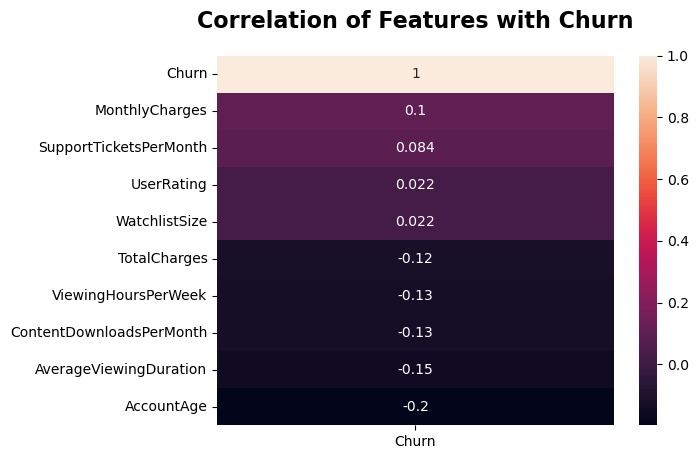

In [61]:
sns.heatmap(train_df.corr()['Churn'].sort_values(ascending=False).to_frame(), annot=True)

plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold', pad=20)
plt.show()

In [62]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

feature_selector = SelectKBest(f_classif, k=12)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

In [63]:
svm_model = SVC(kernel='rbf', random_state=0, probability=True)
svm_model.fit(X_train_selected, y_train)

# Using Neural Networks

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
X_test = test_df.drop('CustomerID', axis=1)
y_train = train_df['Churn']

In [9]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10

7619/7619 [==============================] - 12s 2ms/step - loss: 0.4130 - accuracy: 0.8231

Epoch 2/10

7619/7619 [==============================] - 12s 2ms/step - loss: 0.4127 - accuracy: 0.8237

Epoch 3/10

7619/7619 [==============================] - 13s 2ms/step - loss: 0.4125 - accuracy: 0.8238

Epoch 4/10

7619/7619 [==============================] - 12s 2ms/step - loss: 0.4124 - accuracy: 0.8239

Epoch 5/10

7619/7619 [==============================] - 13s 2ms/step - loss: 0.4122 - accuracy: 0.8242

Epoch 6/10

7619/7619 [==============================] - 15s 2ms/step - loss: 0.4122 - accuracy: 0.8238

Epoch 7/10

7619/7619 [==============================] - 14s 2ms/step - loss: 0.4119 - accuracy: 0.8241

Epoch 8/10

7619/7619 [==============================] - 15s 2ms/step - loss: 0.4118 - accuracy: 0.8240

Epoch 9/10

7619/7619 [==============================] - 14s 2ms/step - loss: 0.4117 - accuracy: 0.8241

Epoch 10/10

7619/7619 [==============================]

In [16]:
predicted_probability = model.predict(X_test)[:, 0]

3265/3265 [==============================] - 4s 1ms/step


In [18]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# # Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                              'predicted_probability': predicted_probability})

In [19]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# # View our 'prediction_df' dataframe as required for submission.
# # Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.114776
1,LFR4X92X8H,0.039386
2,QM5GBIYODA,0.320097
3,D9RXTK2K9F,0.021597
4,ENTCCHR1LR,0.195023
5,7A88BB5IO6,0.381982
6,70OMW9XEWR,0.116838
7,EL1RMFMPYL,0.300329
8,4IA2QPT6ZK,0.145728
9,AEDCWHSJDN,0.242964


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!